### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/scratch/SOZONE/ecosystemLooks/depthint-ptrc'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/TOM12_TJ_{tr}-ptrc-{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



Text(0.5, 1.0, 'latitudinal bands, \n Arctic = 1, Subarctic = 2 & so on, SO = 6')

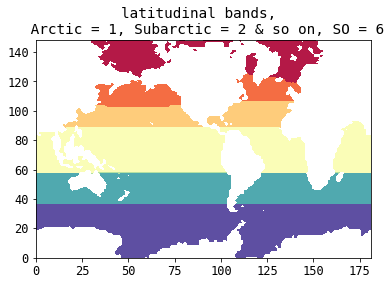

In [5]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

# w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
# cbar = plt.colorbar(w, ticks=tics)
# t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
# plt.suptitle('original ocean regions, subdivided')

# fact = 0.2
# #fig = plt.figure(figsize=(30*fact,15*fact))
# import matplotlib
# cmap = matplotlib.cm.get_cmap('Spectral')
# norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
# for i in range(0,len(regs)):
#     rgba = cmap(norm(regdict[regs[i]]['number']))
#     #plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
#     regdict[regs[i]]['colour'] = rgba
# # plt.legend(ncol = 5, fontsize = 10)
# # plt.suptitle('check that norm of colours works')

plt.figure()
mask_latbands = np.copy(maskno)

mask_latbands[maskno == 0.5] = 1
mask_latbands[(maskno == 1) | (maskno == 2.4)] = 2
mask_latbands[(maskno == 1.2) | (maskno == 2.6)] = 3
mask_latbands[(maskno == 1.4) | (maskno == 2.8) | (maskno == 3.6)] = 4
mask_latbands[(maskno == 1.6) | (maskno == 3.0) | (maskno == 3.8)] = 5
mask_latbands[(maskno == 1.8) | (maskno == 3.2) | (maskno == 4.0)] = 6
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
w = plt.contourf(mask_latbands, vmin = 1, vmax = 6, cmap = cmap)
plt.title('latitudinal bands, \n Arctic = 1, Subarctic = 2 & so on, SO = 6')
#plt.colorbar(w)

In [6]:
p1AA6 = xr.open_mfdataset(make_yearlist(1950,2099,'1AA6'))
p1BA6 = xr.open_mfdataset(make_yearlist(1950,2099,'1BA6'))
p1ASA = xr.open_mfdataset(make_yearlist(1950,2099,'1ASA'))
p1BSA = xr.open_mfdataset(make_yearlist(1950,2099,'1BSA'))